In [1]:
get_ipython().system('pip install lightgbm')

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import lightgbm as lgb

In [3]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [5]:

# Load the training data
train_df = pd.read_csv(r"C:\Users\adhil\OneDrive\Pictures\Titanic_train.csv")

In [6]:
# Print the shape of the DataFrame
print(train_df.shape)

(891, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


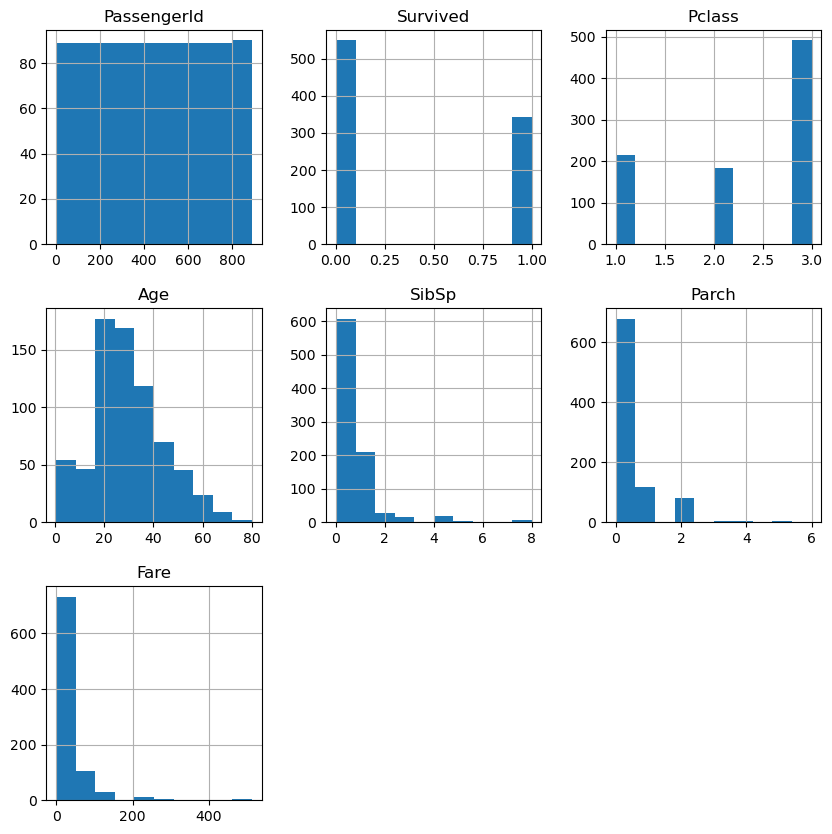

In [9]:


# Exploratory Data Analysis (EDA)

# Check for missing values
print(train_df.isnull().sum())

# Explore data distributions using histograms and box plots
train_df.hist(figsize=(10, 10))
plt.show()


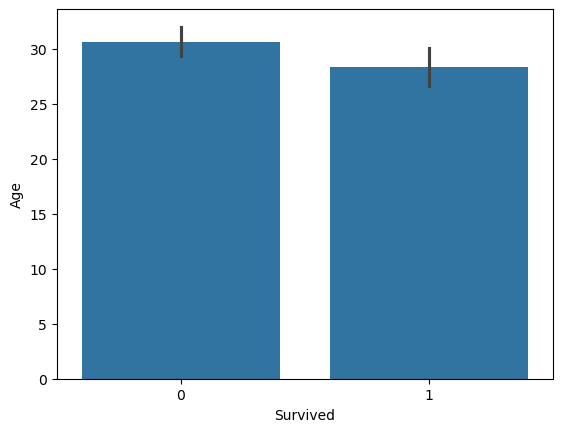

In [10]:
# Visualize relationships between features and survival using scatter plots and bar plots
sns.barplot(x='Survived', y='Age', data=train_df)
plt.show()


In [12]:
# Data Preprocessing

# Impute missing values
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())


In [13]:
print(train_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

In [14]:

# Print the first few rows of the DataFrame before imputing missing values
print("Before imputing missing values:")
print(train_df.head())

# Impute missing values
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

# Print the first few rows of the DataFrame after imputing missing values
print("\nAfter imputing missing values:")
print(train_df.head())

Before imputing missing values:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373

In [18]:
# Encode categorical variables using one-hot encoding or label encoding
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'Embarked' column
train_df['Embarked'] = encoder.fit_transform(train_df['Embarked'])

# Print the first few rows of the DataFrame to see the encoded values
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN         2  
1          PC 17599  71.2833   C85         0  
2  STON/O2. 3101282   7.9250   NaN         2  
3            113803  53.1000  C123         2  
4            373450   8.0500   NaN         2  


In [20]:
# Print the first few rows of the feature matrix X
print("Feature Matrix X:")
print(X.head())

# Print the first few rows of the target variable y
print("\nTarget Variable y:")
print(y.head())

Feature Matrix X:
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1       3    1  22.0      1      0   7.2500         2
1            2       1    0  38.0      1      0  71.2833         0
2            3       3    0  26.0      0      0   7.9250         2
3            4       1    0  35.0      1      0  53.1000         2
4            5       3    1  35.0      0      0   8.0500         2

Target Variable y:
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [21]:
# Define feature matrix X and target variable y
X = train_df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_df['Survived']

# Print the first few rows of the feature matrix X
print("Feature Matrix X:")
print(X.head())

# Print the first few rows of the target variable y
print("\nTarget Variable y:")
print(y.head())

Feature Matrix X:
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1       3    1  22.0      1      0   7.2500         2
1            2       1    0  38.0      1      0  71.2833         0
2            3       3    0  26.0      0      0   7.9250         2
3            4       1    0  35.0      1      0  53.1000         2
4            5       3    1  35.0      0      0   8.0500         2

Target Variable y:
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [23]:
# Split the preprocessed dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Split the preprocessed dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (712, 8)
X_test shape: (179, 8)
y_train shape: (712,)
y_test shape: (179,)


In [25]:
# Building Predictive Models using LightGBM and XGBoost

# LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
params = {'objective': 'binary', 'metric': 'auc', 'boosting_type': 'gbdt', 'num_leaves': 31, 'learning_rate': 0.05}
model_lgb = lgb.train(params, train_data, 100)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [26]:
# XGBoost
model_xgb = xgb.XGBClassifier(objective='binary:logistic', max_depth=6, learning_rate=0.1, n_estimators=100, seed=42)
model_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [30]:
# Model Evaluation

# LightGBM
y_pred_lgb
from sklearn.model_selection import train_test_split

# Split the preprocessed dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("Code executed successfully!")

X_train shape: (712, 8)
X_test shape: (179, 8)
y_train shape: (712,)
y_test shape: (179,)
Code executed successfully!


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# XGBoost
y_pred_xgb = model_xgb.predict(X_test)
y_pred_xgb_class = (y_pred_xgb >= 0.5).astype(int)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_class)
precision_xgb = precision_score(y_test, y_pred_xgb_class)
recall_xgb = recall_score(y_test, y_pred_xgb_class)
f1_xgb = f1_score(y_test, y_pred_xgb_class)

# Print the evaluation metrics
print("XGBoost Model Evaluation Metrics:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)

XGBoost Model Evaluation Metrics:
Accuracy: 0.8156424581005587
Precision: 0.7971014492753623
Recall: 0.7432432432432432
F1 Score: 0.7692307692307693


In [34]:

# Comparative Analysis

print("LightGBM Metrics:")
print("Accuracy:", accuracy_lgb)
print("Precision:", precision_lgb)
print("Recall:", recall_lgb)
print("F1-score:", f1_lgb)

print("XGBoost Metrics:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)


LightGBM Metrics:
Accuracy: 0.8156424581005587
Precision: 0.7808219178082192
Recall: 0.7702702702702703
F1-score: 0.7755102040816326
XGBoost Metrics:
Accuracy: 0.8156424581005587
Precision: 0.7971014492753623
Recall: 0.7432432432432432
